In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from os.path import join, split

In [2]:
def statistics(df01, path2, txt_file, col_name, ref_value=0.):
    """
    Graba en un fichero los estadísticos de una columna de una hoja Excel
    df01: pandas dataframe
        Instanciada fuera de la función
    path2: txt
        Nombre del directorio donde se grabarán los resultados
    txt_file: txt
        Nombre del fichero txt de resultados
    column01: txt
        Nombre de la columna en la hoja Excel que coincide con el nombre en el dataframe
    ref_value: float
        Se calcula el número de sondeos por envina y por debajo de ref_value
    Return: None
    """
    with open(join(path2, txt_file), 'w') as fo:
        ndata = df01[col_name].count()
        fo.write(f"medidas\t{ndata:d}\n")
        fo.write(f"media\t{df01[col_name].mean():f}\n")
        fo.write(f"mediana\t{df01[col_name].median():f}\n")
        fo.write(f"percentil 10\t{df01[col_name].quantile(0.1):f}\n")
        fo.write(f"percentil 25\t{df01[col_name].quantile(0.25):f}\n")
        fo.write(f"percentil 75\t{df01[col_name].quantile(0.75):f}\n")
        fo.write(f"percentil 90\t{df01[col_name].quantile(0.9):f}\n")
        fo.write(f"skew\t{df01[col_name].skew():f}\n")
        fo.write(f"mínimo\t{df01[col_name].min():f}\n")
        fo.write(f"máximo\t{df01[col_name].max():f}\n")
        
        column = df01[col_name]
        n_gt_ref = column[column > ref_value].count()
        
        fo.write(f"n sondeos medida > que {ref_value:f}:\t{n_gt_ref:d}\n")
        fo.write(f"n sondeos medida < que {ref_value:f}\t{ndata-n_gt_ref:d}\n")
        
        print(f'se ha grabado {txt_file}')


In [3]:
def histogram(path2, fi_name, df01, col_name, title, xlabel, ylabel, nbins=30, color='#1f77b4'):
    """
    Graba en un histograma en un fichero png
    df01: pandas dataframe
        Instanciado fuera de la función
    path2: txt
        Nombre del directorio donde se grabarán los resultados
    fi:name: txt
        Nombre del fichero png de resultados
    df01: pandas dataframe
        Instanciada fuera de la función        
    col_name: txt
        Nombre de la columna en la hoja Excel que coincide con el nombre en el dataframe
    title: txt
        Título del gráfico
    xlabel: txt
        nombre del eje de las x
    ylabel: txt
        nombre del eje de las y
    Return: None    
    """

    fig = plt.hist(df01[col_name], density=False, bins=nbins, color=color)  # `density=False` would make counts
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.savefig(join(path2, fi_name))
    print(f'grabado {fi_name}')
    

## Piezometría CHS 2021. Fichero de datos

Para hacer el análisis buscado se requiere un fichero Excel con al menos las siguientes 3 sheets: 
1. Profundidad media en el año
1. Variación de la profundidad media entre dos años: 2021 y 2020
1. Variación de la profundidad media entre dos años: 2021 y 2016

También pueden ser 3 csv, para lo que abrá que modficar los open<br>
Hojas en el fichero Excel de datos

In [4]:
fi01=r'H:\LSGB\20220324_informe_pz\memoria\data_analisis.xlsx'
path2, data_file = split(fi01)

df = pd.read_excel(fi01, None);
print('sheets')
for key in df.keys():
    print(key)


sheets
Prof_media_2021_m
pnp_2021_2020
pnp_2021_2016
masub


## Profundidad media del agua subterránea en 2021

### Hoja de datos

In [42]:
sheet01 = 'Prof_media_2021_m'
df01 = pd.read_excel(fi01, sheet_name=sheet01, converters={'masub':str})
df01.dtypes

masub         object
nombre        object
id            object
pnp          float64
sdev         float64
n_medidas      int64
red           object
dtype: object

### Estadísticos muestrales

In [46]:
output_file = 'pnp_avg_2021.txt'
col_name1 = 'pnp'

statistics(df01, path2, output_file, col_name1)

se ha grabado pnp_avg_2021.txt


### Histograma

grabado pnp_avg_2021.png


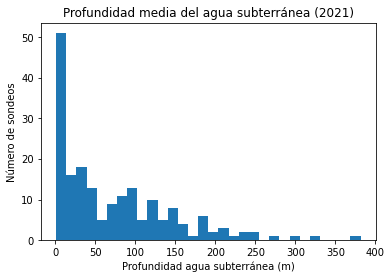

In [15]:
name_file = 'pnp_avg_2021.png'
title = 'Profundidad media del agua subterránea (2021)'
xlabel = 'Profundidad agua subterránea (m)'
ylabel = 'Número de sondeos'
    
histogram(path2, name_file, df01, col_name1, title, xlabel, ylabel)

### Boxplot

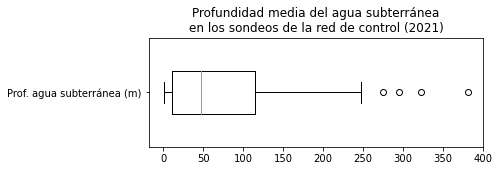

In [19]:
name_file = 'pnp_avg_2021_boxplot.png'
fig1, ax1 = plt.subplots(figsize=(6, 2)) 
ax1.set_title('Profundidad media del agua subterránea\nen los sondeos de la red de control (2021)')
ax1.boxplot(df01[col_name1], widths=0.4, labels=['Prof. agua subterránea (m)'], vert=False)
plt.savefig(join(path2,name_file))

## Variación media de la prof. del agua sub. entre 2021 y 2020

### Hoja de datos

In [7]:
sheet02 = 'pnp_2021_2020'
df02 = pd.read_excel(fi01, sheet_name=sheet02, converters={'masub':str})
df02.dtypes

masub                 object
nombre                object
sondeo                object
pnp_var_2021_2020    float64
geom                  object
dtype: object

### Estadísticos muestrales

In [47]:
output_file = 'pnp_dif_2021_2020.txt'
col_name2 = 'pnp_var_2021_2020'

statistics(df02, path2, output_file, col_name2)

se ha grabado pnp_dif_2021_2020.txt


### Histograma

grabado pnp_dif_2021_2020.png


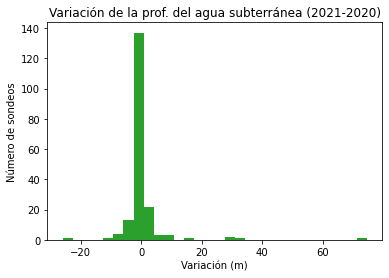

In [24]:
name_file = 'pnp_dif_2021_2020.png'
title = 'Variación de la prof. del agua subterránea (2021-2020)'
xlabel = 'Variación (m)'
ylabel = 'Número de sondeos'
color = '#2ca02c' # verde suave
    
histogram(path2, name_file, df02, col_name2, title, xlabel, ylabel, color=color)

### Agrupación por MASUB

In [47]:
print(df02.groupby(['masub', 'nombre']).agg({'pnp_var_2021_2020':['mean', 'count']}))

                                        pnp_var_2021_2020      
                                                     mean count
masub   nombre                                                 
070.001 Corral Rubio                             0.217500     2
070.002 Sinclinal de la Higuera                 -2.266000     2
070.003 Alcadozo                                -1.332222     3
070.004 Boquerón                                -0.102499     2
070.005 Tobarra-Tedera-Pinilla                  -1.072142     3
070.006 Pino                                    -0.151904     1
070.007 Conejeros-Albatana                      -4.503167     2
070.008 Ontur                                    2.875945     3
070.009 Sierra de la Oliva                      -0.681667     1
070.010 Pliegues Jurásicos del Mundo            -0.608262    10
070.011 Cuchillos-Cabras                        -4.010218     7
070.012 Cingla                                   0.148600     5
070.015 Segura-Madera-Tus               

## Variación media de la prof. del agua sub. entre 2021 y 2016

### Hoja de datos

In [43]:
sheet03 = 'pnp_2021_2016'
df03 = pd.read_excel(fi01, sheet_name=sheet03, converters={'masub':str})
df03.dtypes

masub               object
nombre              object
sondeo              object
pnp_var_2021_16    float64
geom                object
dtype: object

### Estadísticos muestrales

In [49]:
output_file = 'pnp_dif_2021_2016.txt'
col_name3 = 'pnp_var_2021_16'

statistics(df03, path2, output_file, col_name3)

se ha grabado pnp_dif_2021_2016.txt


### Histograma

grabado pnp_dif_2021_2016.png


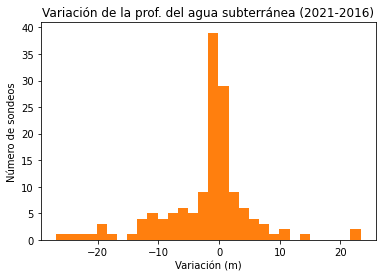

In [31]:
name_file = 'pnp_dif_2021_2016.png'
title = 'Variación de la prof. del agua subterránea (2021-2016)'
xlabel = 'Variación (m)'
ylabel = 'Número de sondeos'
color = '#ff7f0e' # verde suave
    
histogram(path2, name_file, df03, col_name3, title, xlabel, ylabel, color=color)

### Agregación por MASUB

In [7]:
for col in df03.columns:
    print(col)

masub
nombre
sondeo
pnp_var_2021_16
geom


In [44]:
print(df03.groupby(['masub', 'nombre']).agg({'pnp_var_2021_16':['mean', 'count']}))


                                        pnp_var_2021_16      
                                                   mean count
masub   nombre                                               
070.001 Corral Rubio                          -3.748332     2
070.002 Sinclinal de la Higuera               -9.300004     2
070.003 Alcadozo                              -8.259999     3
070.004 Boquerón                               2.490000     2
070.005 Tobarra-Tedera-Pinilla                -2.269045     2
070.006 Pino                                   0.551428     1
070.008 Ontur                                  7.269723     3
070.009 Sierra de la Oliva                    -1.351659     1
070.010 Pliegues Jurásicos del Mundo          -0.825715    10
070.011 Cuchillos-Cabras                       1.485357     6
070.012 Cingla                                 2.536110     3
070.020 Anticlinal de Socovos                 -1.096499     2
070.021 El Molar                              -1.759078     6
070.022 